In [142]:
# 데이터 분석으로 심부전증을 예방할 수 있을까?
# 심부전 발생 가능성을 예측하는 데 사용될 수 있는 데이터셋

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [145]:
df.info()

# age: 환자의 나이
# anaemia: 빈혈 여부 (0: 정상, 1: 빈혈)
# creatinine_phosphokinase: 혈액 내의 크레아틴 인산염 키나제(CK) 수치
# diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
# ejection_fraction: 심장 박출계수 (%)
# high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
# platelets: 혈소판의 수 (kiloplatelets/mL)
# serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
# serum_sodium: 혈중 나트륨 레벨 (mEq/L)
# sex: 성별 (0: 여성, 1: 남성)
# smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
# time: 관찰 기간
# DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [146]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [147]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [148]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

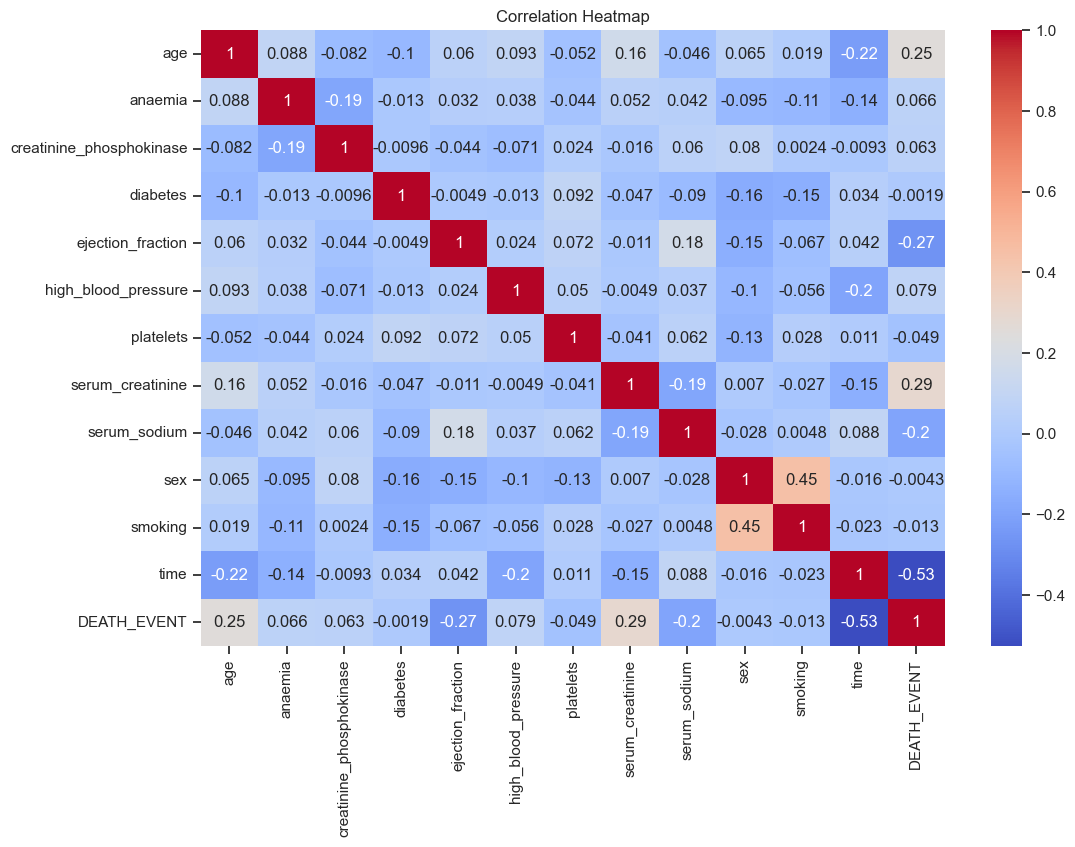

In [149]:
# 상관행렬 히트맵

corr_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

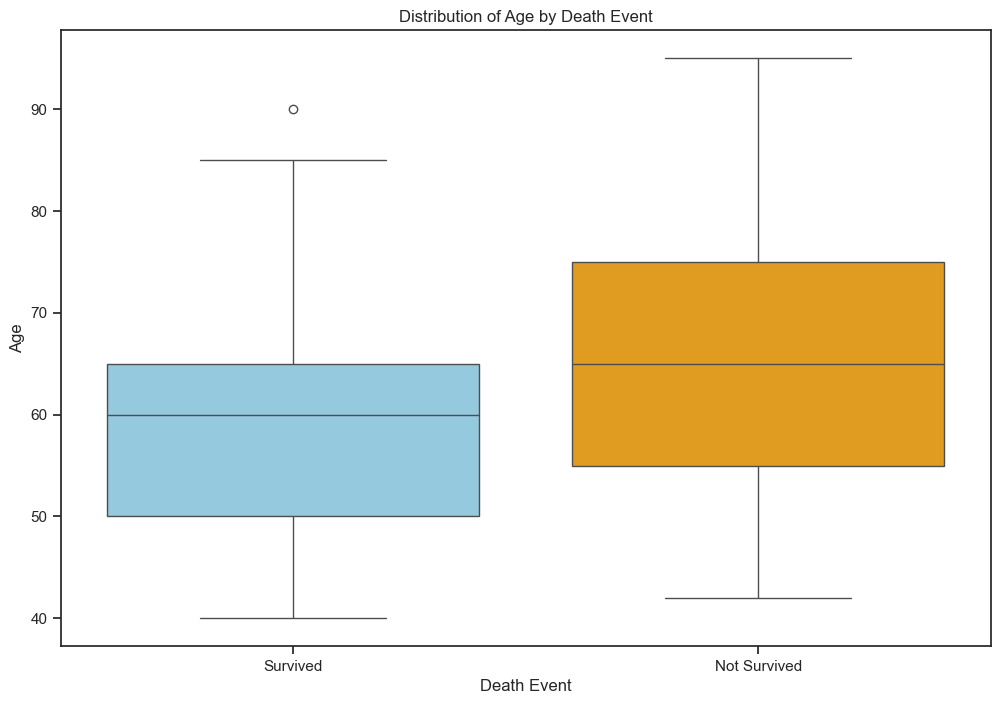

In [150]:
# 'age'와 'DEATH_EVENT'간의 Boxplot 생성. 이상치 확인

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='DEATH_EVENT', y='age', palette=['skyblue', 'orange']) #생존 그룹은 orange, 사망 그룹 'blue'
plt.title('Distribution of Age by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.show()

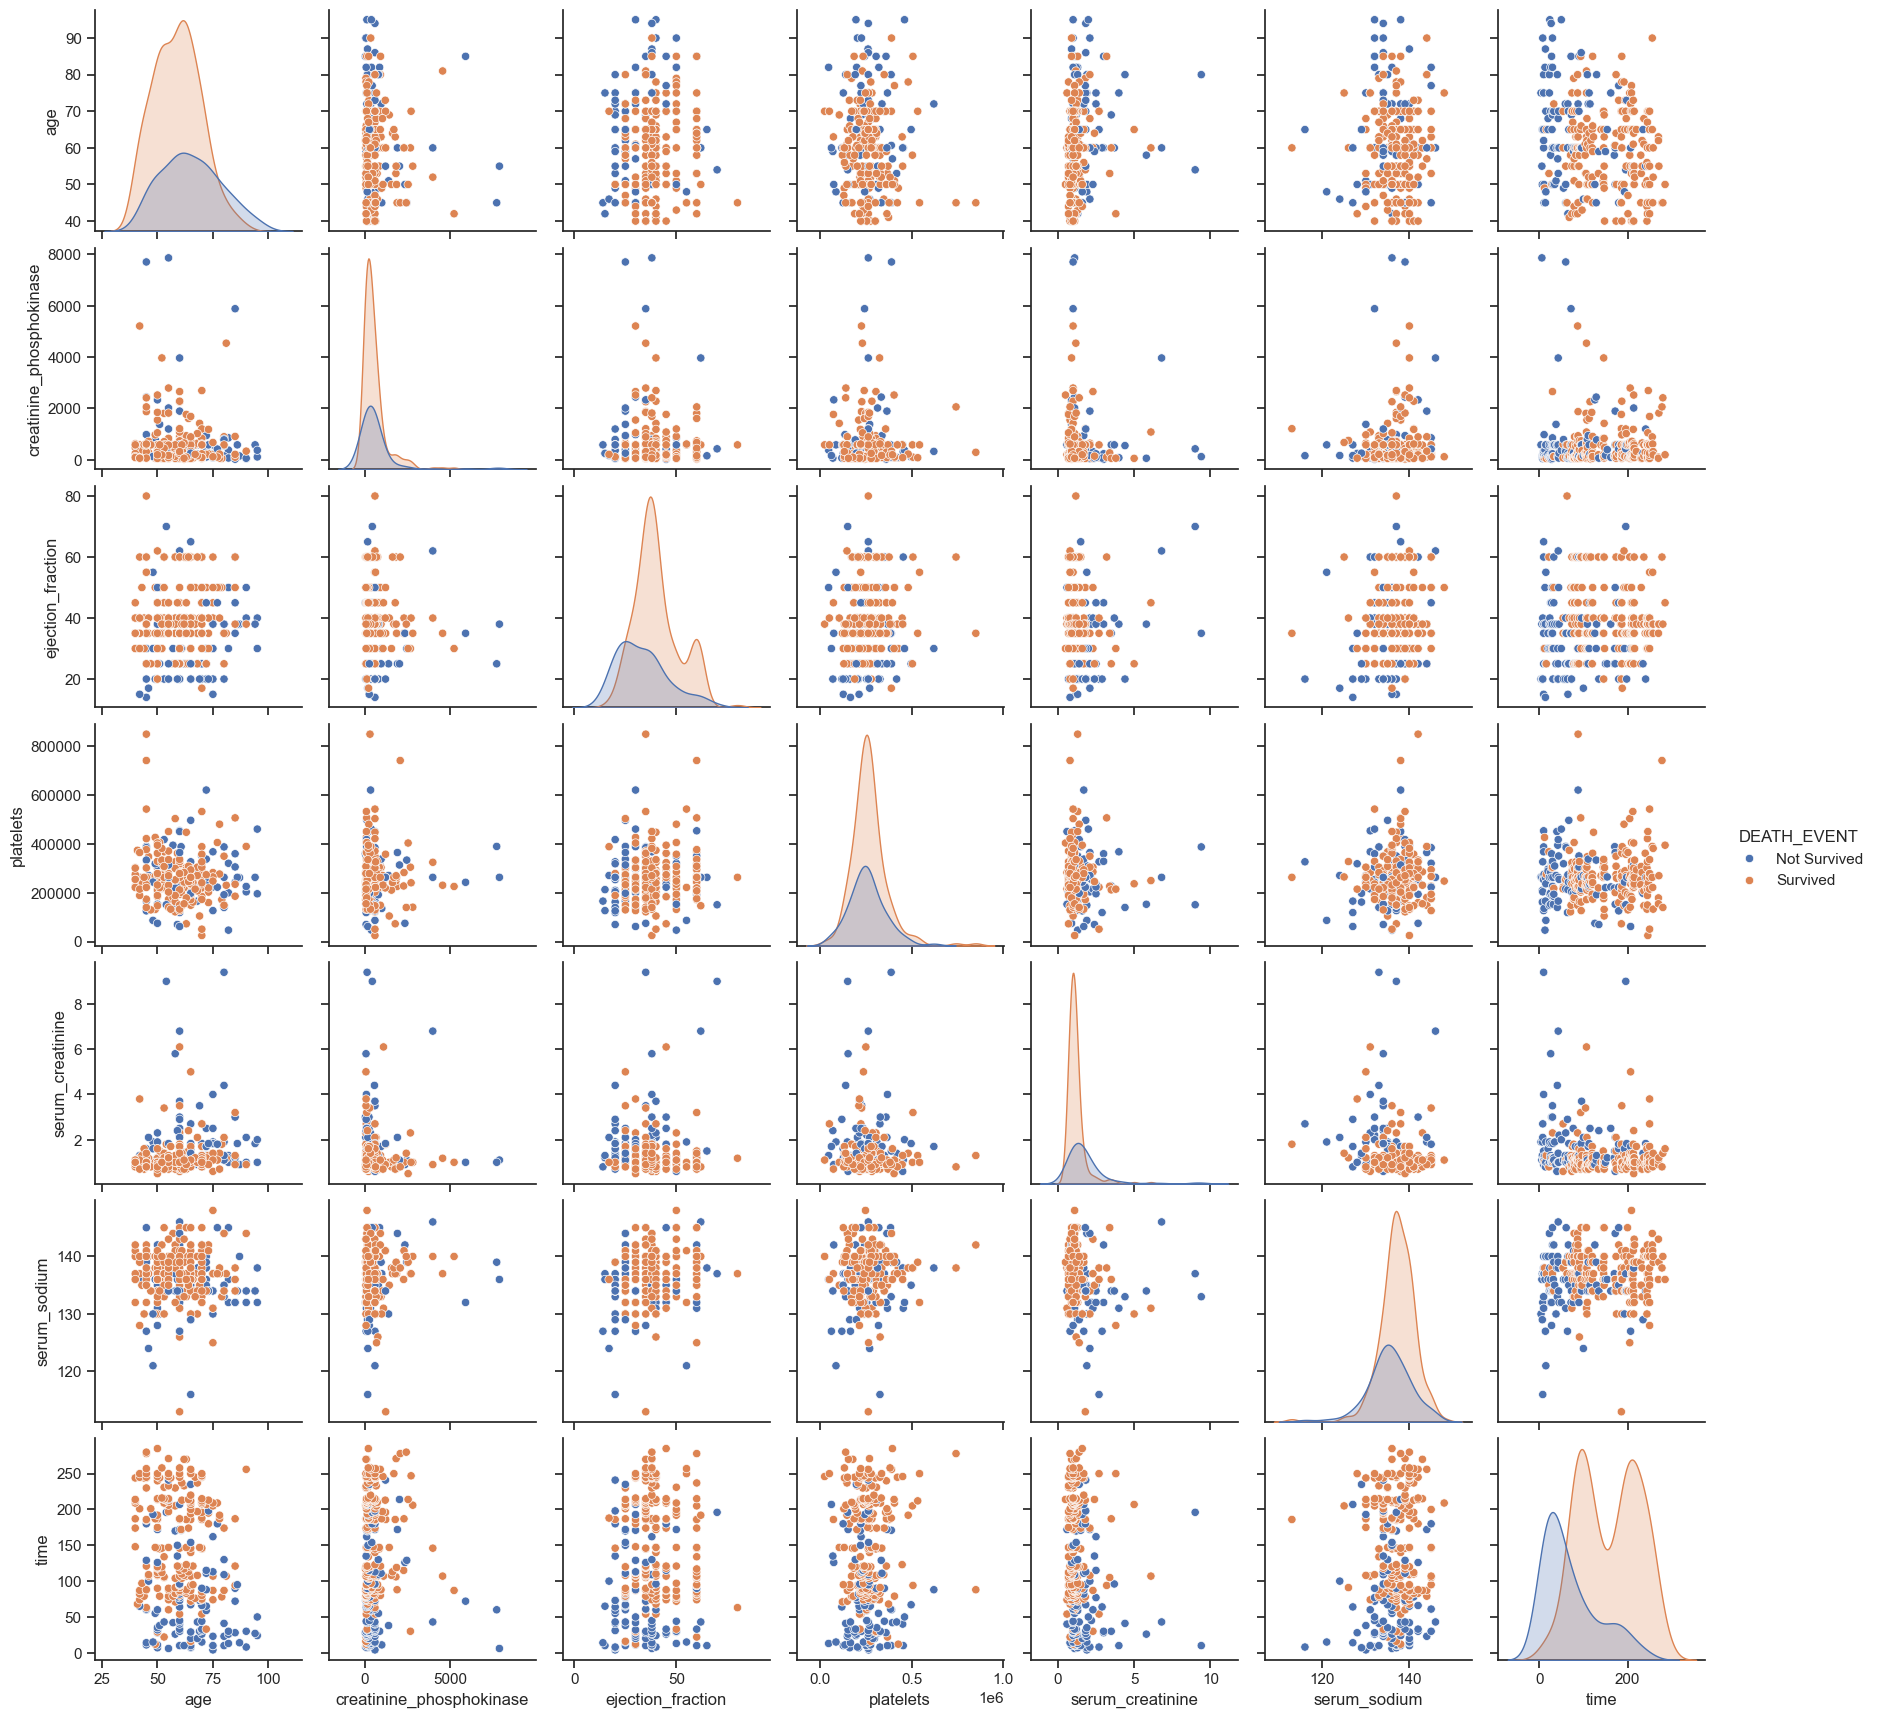

In [152]:
# 'DEATH_EVENT'열을 hue로 지정하여 각각의 카테고리에 해당하는 데이터를 다른 색상으로 표시
# 각 변수들 간의 상관관계와 'DEATH_EVENT'에 따른 데이터의 분포 => 사망과 생존에 영향을 미치는 요인을 분석하는 데 활용

data = df.copy()
data.loc[data.DEATH_EVENT == 0, 'DEATH_EVENT'] = "Survived"
data.loc[data.DEATH_EVENT == 1, 'DEATH_EVENT'] = "Not Survived"
sns.pairplot(data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT')

Preprocessing

In [153]:
# 'DEATH_EVENT' 열을 제외한 X에 MinMaxScaler 적용

from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [154]:
y.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [155]:
# MinMaxScaler를 사용하여 정규화(=데이터의 범위를 일치시키고, 모든 값을 0과 1사이의 범위로 변환)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [156]:
# 데이터셋 X와 y를 학습용과 테스트용으로 분할
# stratify=y: 데이터를 나눌 때 클래스 레이블을 기준으로 계층적으로 샘플링 => 데이터 분포의 불균형을 최소화

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

1. 로지스틱 회귀 (Logistic Regression)

In [157]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l2', C=5, max_iter=1000, random_state=42)

# 모델 학습하기
lr_model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=1000, random_state=42)

In [158]:
# 결과 예측하기

from sklearn.metrics import classification_report, confusion_matrix

lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [159]:
# 모델의 성능을 측정 (모델이 얼마나 잘 학습되었는지)
lr_model.score(X_train, y_train)

0.8516746411483254

In [160]:
# 모델의 성능을 측정 (모델이 훈련 데이터에 얼마나 잘 적합되었는지)
lr_model.score(X_test, y_test)

0.8333333333333334

In [161]:
# 예측의 정확도를 측정

from sklearn.metrics import accuracy_score

print('Logistic Regression Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, lr_pred)*100))

Logistic Regression Model, accuracy score : 83.33%


In [162]:
from imblearn.over_sampling import SMOTE

smt=SMOTE(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over=smt.fit_resample(X_train, y_train)

print('SMOTE 적용 전 데이터셋: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 데이터셋: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: , \n', y_train_over.value_counts())

SMOTE 적용 전 데이터셋:  (209, 12) (209,)
SMOTE 적용 후 데이터셋:  (284, 12) (284,)
SMOTE 적용 후 레이블 값 분포: , 
 DEATH_EVENT
1    142
0    142
Name: count, dtype: int64


In [163]:
# SMOTE 적용
lr_model.fit(X_train_over, y_train_over)
lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        61
           1       0.66      0.72      0.69        29

    accuracy                           0.79        90
   macro avg       0.76      0.77      0.76        90
weighted avg       0.80      0.79      0.79        90



In [164]:
lr_model.score(X_train_over, y_train_over) # SMOTE 적용 시 과대적합 증가

0.8626760563380281

In [166]:
print('(SMOTE) Logistic Regression Model, accuracy score: {:.2f}%'.format(accuracy_score(y_test, lr_pred)*100))

(SMOTE) Logistic Regression Model, accuracy score: 78.89%


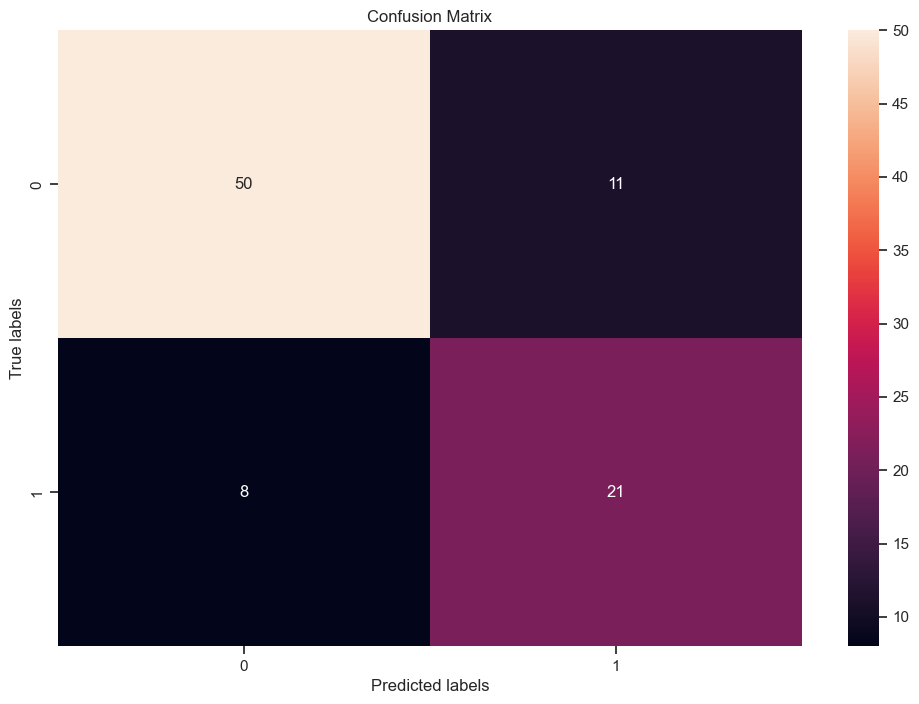

In [199]:
# Logistic Regression 모델의 성능을 평가하기 위해 혼동행렬 생성

conf_matrix = confusion_matrix(y_test, lr_model.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d') #annot=True: 각 셀에 숫자를 표시하도록 지정, fmt=d: 숫자 형식을 정수로 지정
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

2. 의사결정 트리 (Decision Tree)

In [167]:
# 의사결정 트리 모델을 초기화하고 학습 (데이터의 불순도를 최소화하기 위해)

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

# 모델 학습하기
dt_model.fit(X_train, y_train)

# max_depth: 트리의 최대 깊이 제한 설정, min_samples_leaf: 리프 노드의 최소 샘플 수 설정 => 과적합을 방지하고 일반화 성능을 향상

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

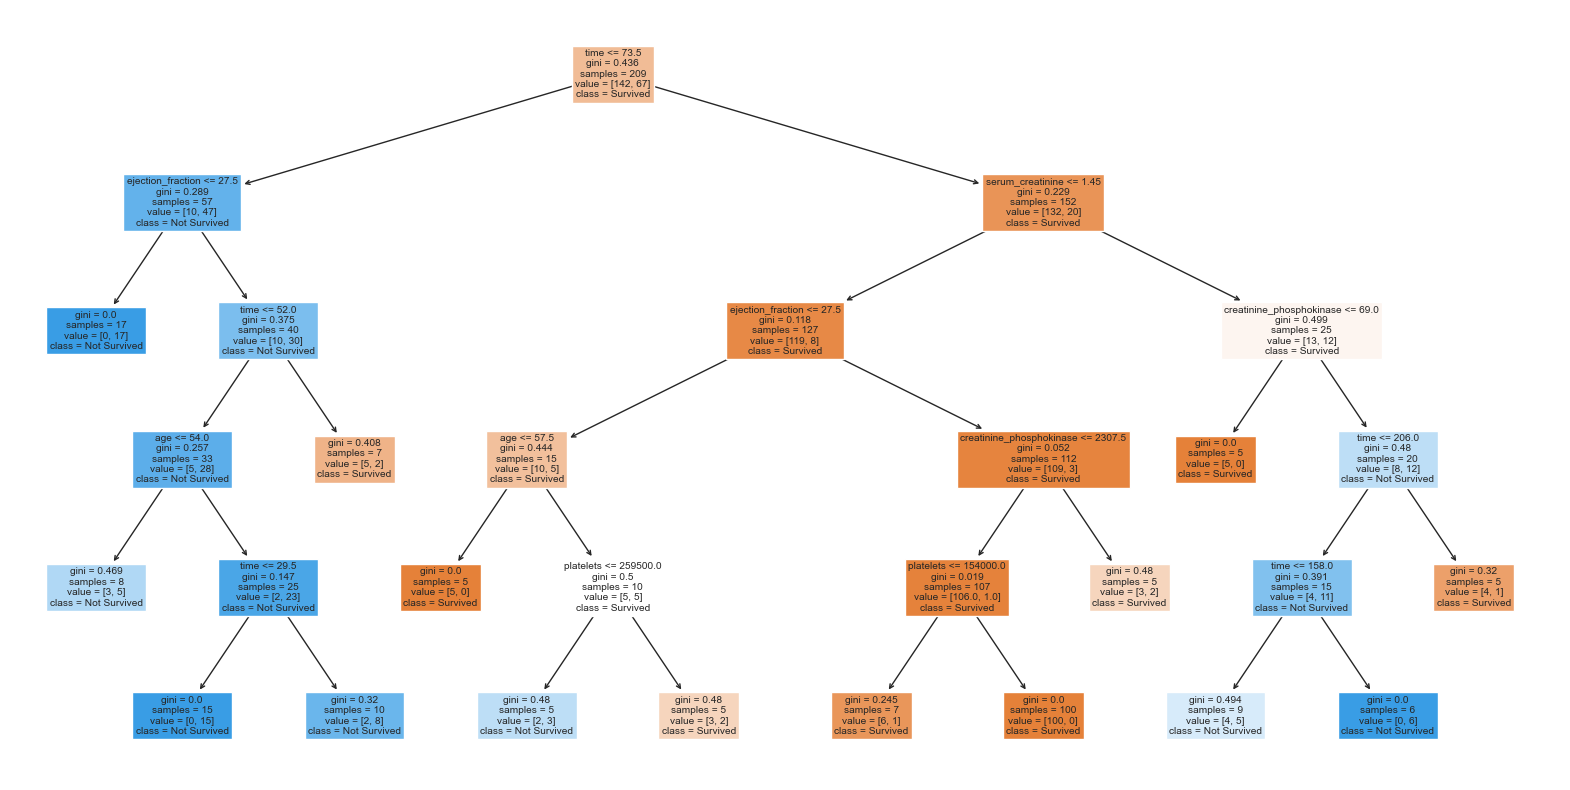

In [168]:
# 결정 트리(Decision Tree) 모델 시각화 => 모델의 특성 중요도나 예측 경로를 이해하는 데 도움

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Survived', 'Not Survived'], filled=True)
plt.show()

In [169]:
# 결과 예측하기
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        61
           1       0.72      0.72      0.72        29

    accuracy                           0.82        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90



In [170]:
# 모델의 성능을 측정 (모델이 얼마나 잘 학습되었는지)
dt_model.score(X_train, y_train)

0.9090909090909091

In [171]:
# 모델의 성능을 측정 (모델이 훈련 데이터에 얼마나 잘 적합되었는지)
dt_model.score(X_test, y_test)

0.8222222222222222

In [172]:
# 예측의 정확도를 측정
print('Dscision Tree Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, dt_pred)*100))

Dscision Tree Model, accuracy score : 82.22%


In [173]:
# SMOTE 적용
dt_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [174]:
dt_model.score(X_train_over, y_train_over) # SMOTE 적용 시 과대적합 증가

0.9084507042253521

In [175]:
print('(SMOTE) Dscision Tree Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, dt_pred)*100))

(SMOTE) Dscision Tree Model, accuracy score : 82.22%


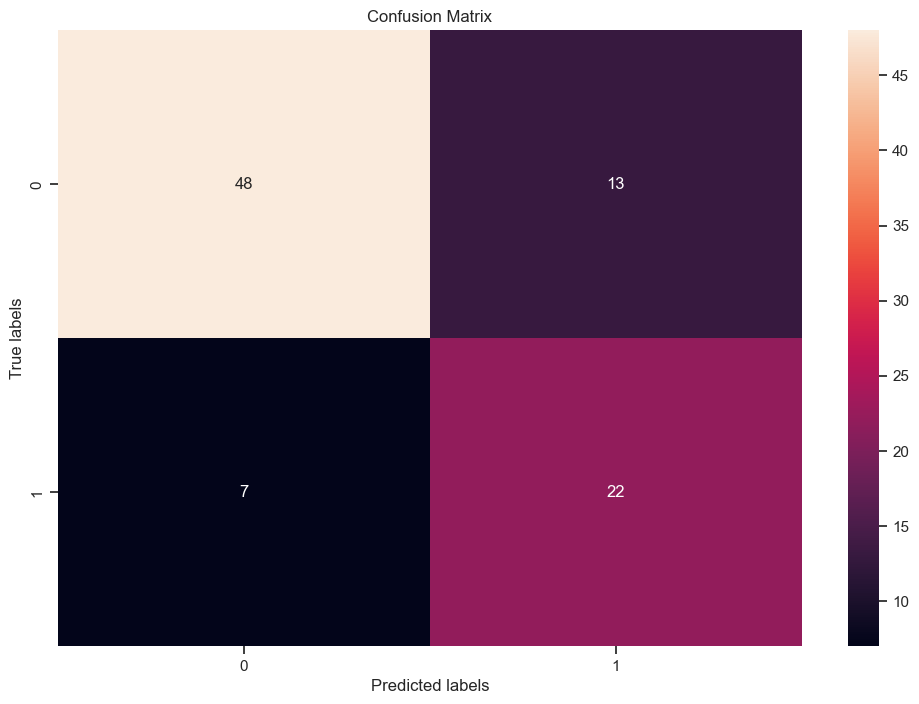

In [198]:
# Decison Tree 모델의 성능을 평가하기 위해 혼동행렬 생성

conf_matrix = confusion_matrix(y_test, dt_model.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

3. 랜덤 포레스트 (Random Forest)

In [176]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 10, # 10개의 결정 트리
    max_leaf_nodes = 5, # 각 트리는 최대 5개의 잎 노드를 가짐
    n_jobs = -1 # 가능한 모든 CPU 코어 사용
)

# 모델 학습하기
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=10, n_jobs=-1)

In [177]:
# 결과 예측하기
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        61
           1       0.82      0.62      0.71        29

    accuracy                           0.83        90
   macro avg       0.83      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



In [178]:
rf_model.score(X_train, y_train)

0.8755980861244019

In [179]:
rf_model.score(X_test, y_test)

0.8333333333333334

In [180]:
# 예측의 정확도를 측정
print('Random Forest Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, rf_pred)*100))

Random Forest Model, accuracy score : 83.33%


In [ ]:
# SMOTE 적용
rf_model.fit(X_train_over, y_train_over)

In [182]:
rf_model.score(X_train_over, y_train_over) # SMOTE 적용 시 과대적합 증가

0.9084507042253521

In [183]:
print('(SMOTE) Random Forest Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, rf_pred)*100))

(SMOTE) Random Forest Model, accuracy score : 83.33%


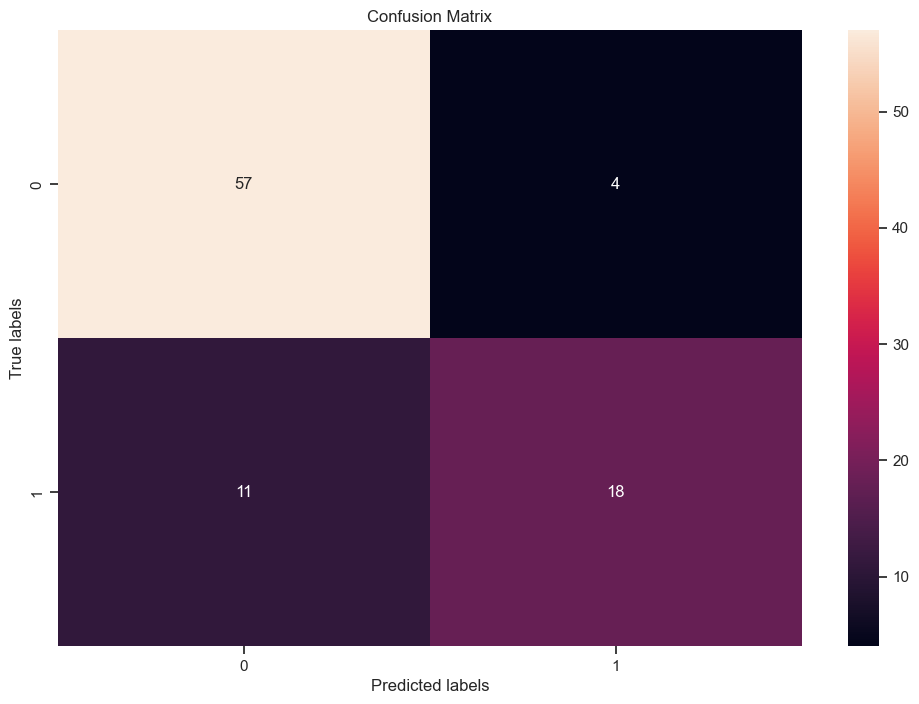

In [181]:
# Random Forest 모델의 성능을 평가하기 위해 혼동행렬 생성

conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4. 서포트 벡터 머신 (Support Vector Machine, SVM)

In [184]:
from sklearn.svm import SVC

svm_model = SVC(gamma='auto', C=5)

# 모델 학습하기
svm_model.fit(X_train, y_train)

SVC(C=5, gamma='auto')

In [185]:
# 결과 예측하기
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90



In [186]:
svm_model.score(X_train, y_train)

1.0

In [187]:
svm_model.score(X_test, y_test)

0.6777777777777778

In [188]:
# SMOTE 적용
svm_model.fit(X_train_over, y_train_over)

SVC(C=5, gamma='auto')

In [189]:
svm_model.score(X_train_over, y_train_over)

1.0

In [190]:
print('(SMOTE) Dscision Tree Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, svm_pred)*100))

(SMOTE) Dscision Tree Model, accuracy score : 67.78%


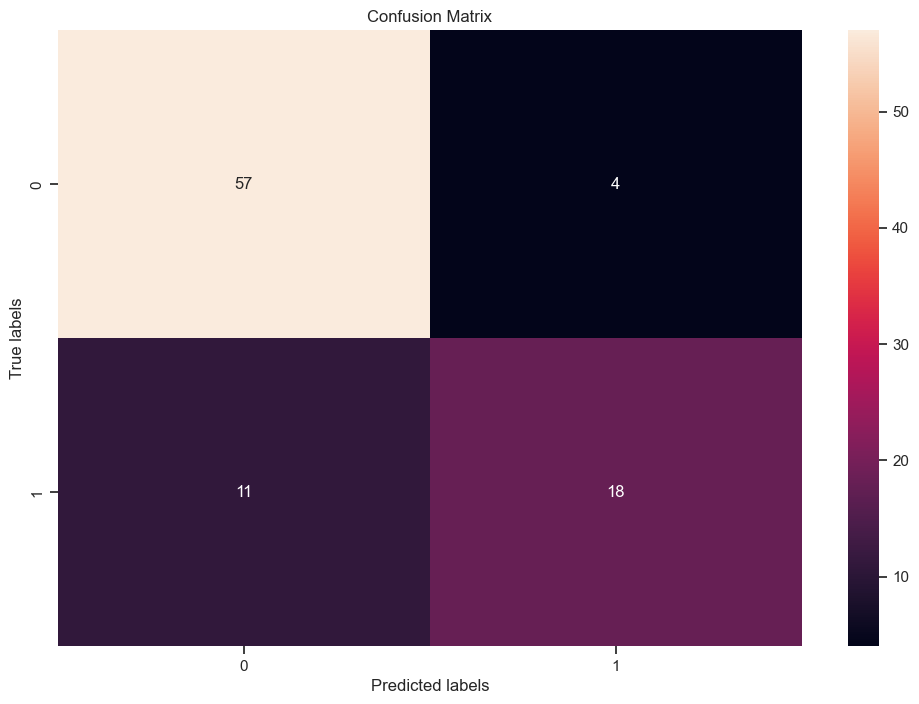

In [200]:
# Support Vector Machine 모델의 성능을 평가하기 위해 혼동행렬 생성

conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d') #annot=True: 각 셀에 숫자를 표시하도록 지정, fmt=d: 숫자 형식을 정수로 지정
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

5. XGBoost (eXtreme Gradient Boosting)

In [191]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

# 모델 학습하기
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

feature importance

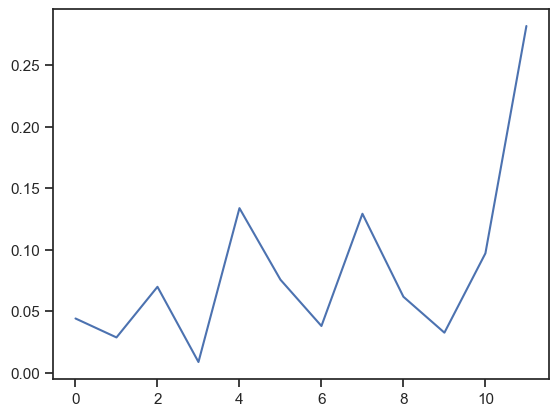

In [192]:
# XGBoost 모델에서 추출된 특성 중요도를 선 그래프로 시각화
# 7번째 컬럼이 가장 큰 영향

plt.plot(xgb_model.feature_importances_)

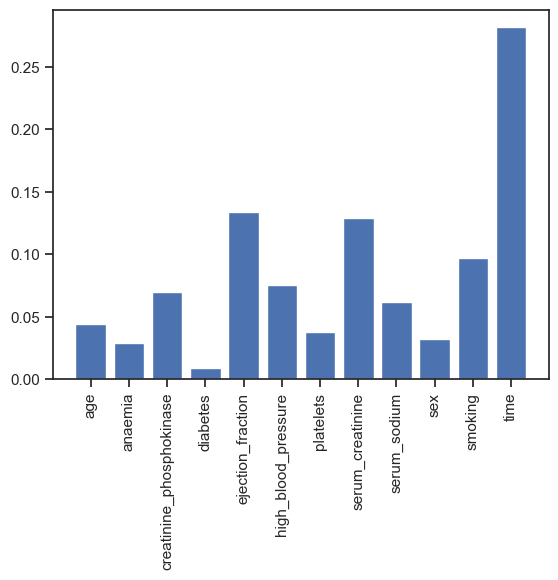

In [193]:
# XGBoost 모델에서 추출된 특성 중요도를 막대 그래프로 시각화
# 'time'이라는 특성이 가장 큰 영향

plt.bar(X.columns, xgb_model.feature_importances_)
plt.xticks(rotation=90) # X축의 눈금 레이블을 90도 회전하여 표시
plt.show()

In [194]:
# 결과 예측하기
xgb_pred = xgb_model.predict(X_test)

In [195]:
xgb_model.score(X_train, y_train)

1.0

In [196]:
# XGBOOST 모델의 정확도를 백분율로 출력

from sklearn.metrics import accuracy_score

print('XGBoost Model, accuracy score : {:.2f}%'.format(accuracy_score(y_test, xgb_pred)*100))

XGBoost Model, accuracy score : 80.00%


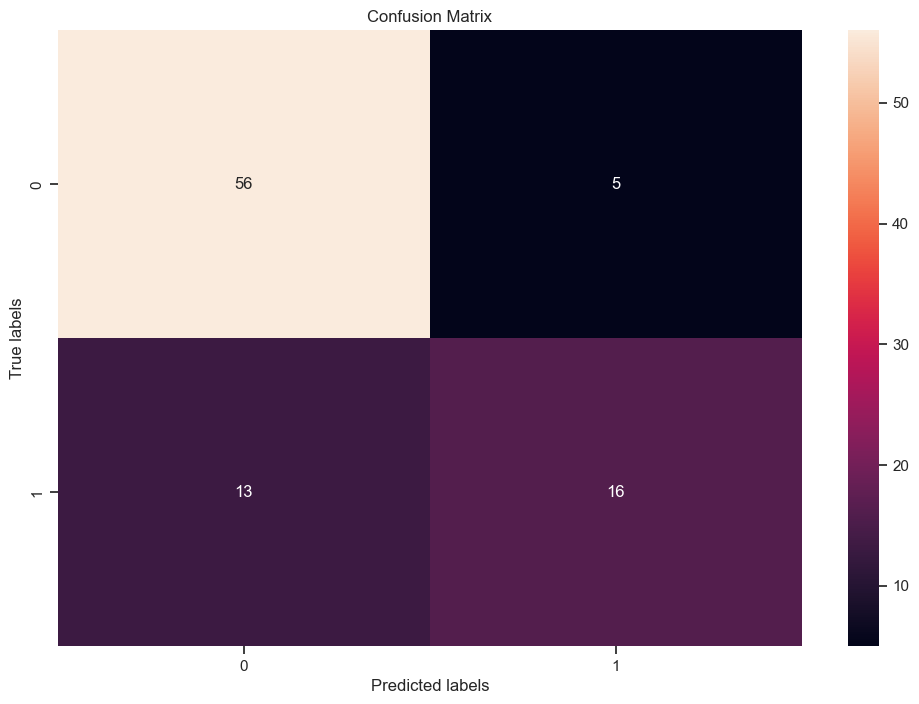

In [202]:
# XGBoost 모델의 성능을 평가하기 위해 혼동행렬 생성

conf_matrix = confusion_matrix(y_test, xgb_model.predict(X_test))

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d') #annot=True: 각 셀에 숫자를 표시하도록 지정, fmt=d: 숫자 형식을 정수로 지정
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

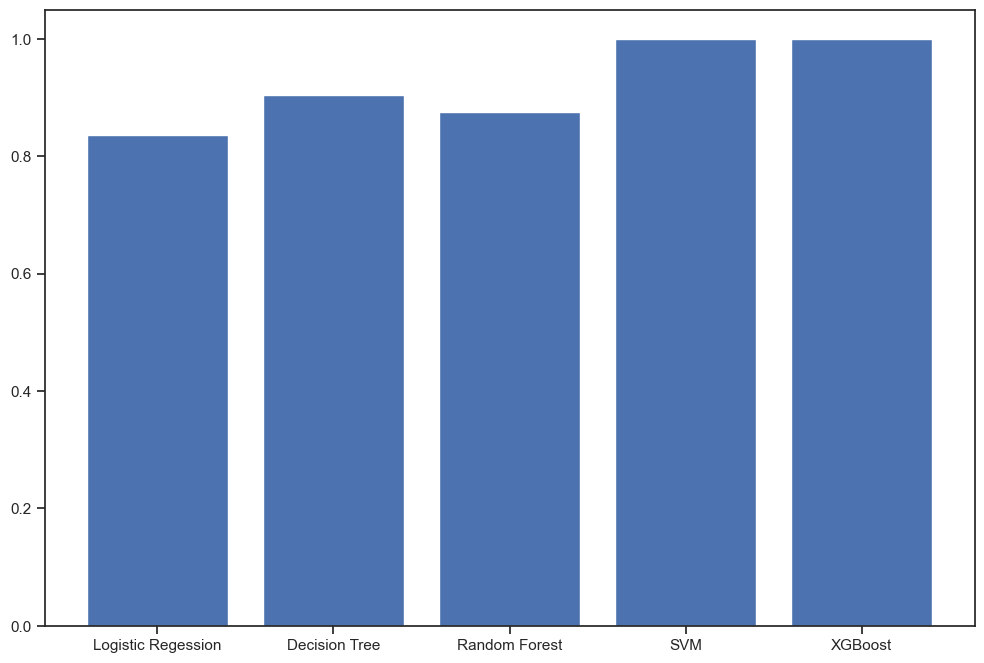

In [204]:
# 모델에 따른 정확도(Accuracy)
acc_lr=accuracy_score(y_train, lr_model.predict(X_train))
acc_dt=accuracy_score(y_train, dt_model.predict(X_train))
acc_rf=accuracy_score(y_train, rf_model.predict(X_train))
acc_svm=accuracy_score(y_train, svm_model.predict(X_train))
acc_xgb=accuracy_score(y_train, xgb_model.predict(X_train))

acc = [acc_lr, acc_dt, acc_rf, acc_svm, acc_xgb]
model = ['Logistic Regession', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']

plt.figure(figsize=(12, 8))
plt.bar(model, acc)
plt.show()